In [1]:
import numpy as np
import pandas as pd
from scipy.io import *
from pylab import *
from scipy.signal import *
from pandas import DataFrame as df

In [2]:
#pfc
dataframe_pfc_conrol=pd.read_csv('PFC_Control.csv', sep=',')
dataframe_pfc_conrol=dataframe_pfc_conrol.drop(columns ='Unnamed: 0')
dataframe_pfc_mutation=pd.read_csv('PFC_Mutation.csv', sep=',')
dataframe_pfc_mutation=dataframe_pfc_mutation.drop(columns ='Unnamed: 0')
df_pfc=dataframe_pfc_mutation.merge(dataframe_pfc_conrol, how='outer')
#hpc
dataframe_hpc_conrol=pd.read_csv('HPC_Control.csv', sep=',')
dataframe_hpc_conrol=dataframe_hpc_conrol.drop(columns ='Unnamed: 0')
dataframe_hpc_mutation=pd.read_csv('HPC_Mutation.csv', sep=',')
dataframe_hpc_mutation=dataframe_hpc_mutation.drop(columns ='Unnamed: 0')
df_hpc=dataframe_hpc_mutation.merge(dataframe_hpc_conrol, how='outer')
#Mutation
df_mutation=dataframe_pfc_mutation.merge(dataframe_hpc_mutation, how='outer')

#control
df_control=dataframe_pfc_conrol.merge(dataframe_hpc_conrol, how='outer')


In [25]:
df_mutation

,Rat,Condition,MC,Epoch,Region,REM Data
0,3,HomeCage,Mutation,1,PFC,"[-9.473166984117638, -14.495599538332991, -11...."
1,3,HomeCage,Mutation,2,PFC,"[95.05481905301384, 66.33402364939703, 27.1414..."
2,3,HomeCage,Mutation,1,PFC,"[-190.37975055218047, -185.11615265900136, -17..."
3,3,HomeCage,Mutation,2,PFC,"[80.26229964089282, 83.46984528724758, 68.7028..."
4,3,HomeCage,Mutation,3,PFC,"[-69.19618745032327, -89.95299861420402, -98.7..."
...,...,...,...,...,...,...
203,8,HomeCage,Mutation,9,HPC,"[-137.06448829841585, -168.24820754472825, -13..."
204,8,HomeCage,Mutation,10,HPC,"[64.334888841706, 67.33668383299856, 113.41083..."
205,8,HomeCage,Mutation,11,HPC,"[331.5822292113381, 270.25531784082233, 266.94..."
206,8,HomeCage,Mutation,12,HPC,"[630.185036159929, 984.4089466210452, 1091.544..."


In [14]:
df_control

,Rat,Condition,MC,Epoch,Region,REM Data
0,1,HomeCage,Control,1,PFC,"[164.89540595457112, 162.20366099045066, 144.7..."
1,1,HomeCage,Control,2,PFC,"[-76.10023227324045, -113.08559159307933, -59...."
2,1,HomeCage,Control,3,PFC,"[39.39012552655691, 24.052718805653985, 30.289..."
3,1,HomeCage,Control,1,PFC,"[40.42202374389043, 27.924330253336855, 46.711..."
4,1,HomeCage,Control,2,PFC,"[-45.39982670087828, -50.19782487898486, -57.4..."
...,...,...,...,...,...,...
209,9,HomeCage,Control,9,HPC,"[348.4364755434822, 312.8150612671678, 285.907..."
210,9,HomeCage,Control,10,HPC,"[288.9228288941548, 292.7009388703382, 307.496..."
211,9,HomeCage,Control,11,HPC,"[-191.89345946664227, -188.27697220040145, -16..."
212,9,HomeCage,Control,12,HPC,"[110.32038961924289, 148.43555010979088, 175.9..."


In [3]:
#### i=0
def average(df_r, m, nperseg=100, scale=10, step=2):
    length =np.inf
    dataframe = df(columns = ['Rat', 'Condition', 'Epoch','MC','Region','Spectral Analysis Power', 'Spectral Analysis Frequency', 'REM_Data'])
    dataframe['Spectral Analysis Power'] = dataframe['Spectral Analysis Power'].astype(object)
    dataframe['Spectral Analysis Frequency'] = dataframe['Spectral Analysis Frequency'].astype(object)
    dataframe['REM_Data'] = dataframe['REM_Data'].astype(object)

    for rats in set(df_r.Rat.values):
        if rats !=5:
            print('Rat',rats)
            data =df_r.loc[(df_r.Rat==rats), 'REM Data']
            mc = df_r.loc[(df_r.Rat==rats), 'MC'].values[0]
            region = df_r.loc[(df_r.Rat==rats), 'Region'].values[0]
#             print(region,mc)
#             length=int(np.array([len([float(num) for num in s.split(',')[1:-1]]) for s in saf]).mean())
            length_data = int(np.array([len([float(num) for num in d.split(',')[1:-1]]) for d in data]).mean())
            epochd = np.zeros([length_data])
            e=1
            for d in data:
                d = [float(num) for num in d.split(',')[1:-1]]
                #expell small rem cycles
                if len(d) >= length_data:
                    lfp=np.array(d)
                    #spectral plot decibel welch
                    x = lfp
#                     print(x)
                    N = x.shape[0]
                    t = np.array(range(len(x)))
                    dt = t[1]-t[0]
                    T = t[-1]
                    x = x - x.mean()
                    f,pxx = welch(x, step, nperseg=N//nperseg)    # Compute Power spectral density Welch
                    Sxx = 2 * dt ** 2 / T * (pxx * conj(pxx)) # Compute spectrum
        #             Sxx = Sxx[:int(len(x) / 2)]
#                     ylabel('Power [dB]')
#                     xlabel('Frequency[Hz]')
#                     plot(f*1000, (scale*log10(Sxx / max(Sxx))))
        #             xlim([0,200])
        #             savefig('Averaged/%s_Rat%i_Averaged_2_100_20' %(region,rats))
#                     show()
                    #color plot
        #             Fs = 1 / dt               # Define the sampling frequency,
        #             interval = int(N/50)        # ... the interval size,
        #             overlap = int(interval*0.5)  # ... and the overlap intervals

        #                                       Compute the spectrogram
        #             f, t, Sxx = spectrogram(
        #                 x,                  # Provide the signal,
        #                 fs=Fs,                # ... the sampling frequency,
        #                 nperseg=interval,     # ... the length of a segment,
        #                 noverlap=overlap)     # ... the number of samples to overlap,
        #             pcolormesh(t, f*1000, 10 * log10(Sxx),
        #                            cmap='jet')# Plot the result
        #             colorbar()                # ... with a color bar,
        #             xlabel('Time [s]')        # ... and label the axes
        #             ylabel('Frequency [Hz]')
        #             savefig('Averaged/%s_Rat%i_Averaged_Spectrogram_10', %(region,rats))
                    dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
                                                      'Spectral Analysis Power': (10*log10(Sxx / max(Sxx))).tolist(), 'Spectral Analysis Frequency':(f*1000).tolist(), 'REM_Data':x.tolist()}, ignore_index=True)
        #         show()
                    e+=1

    return dataframe
        

In [4]:
# dataframe_hpc_control = average(dataframe_hpc_conrol, 100, scale=10)
# dataframe_hpc_control.to_csv('HPC_control_100_2_10.csv', sep = ',',index=False)

# dataframe_pfc_control=average(dataframe_pfc_conrol,100,scale=10)
# dataframe_pfc_control.to_csv('PFC_control_100_2_10.csv', sep = ',',index=False)

dataframe_hpc_mutation = average(dataframe_hpc_mutation, 100, scale=10)
dataframe_hpc_mutation.to_csv('HPC_mutation_100_2_10.csv', sep = ',',index=False)
dataframe_pfc_mutation=average(dataframe_pfc_mutation,100,scale=10)
dataframe_pfc_mutation.to_csv('PFC_mutation_100_2_10.csv', sep = ',',index=False)


Rat 3


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 3


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 3


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 3


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 3


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 3


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 3


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 3


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 3


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 3


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 3


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 3


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 3


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 3


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 4


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 7


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Rat 8


/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe  = dataframe.append({'Rat': rats, 'Condition': 'HomeCage','Epoch':e, 'MC':mc,'Region':region,\
/tmp/ipykernel_14588/4140506049.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

In [ ]:
dataframe_mutation 

In [ ]:
dataframe = pd.concat([dataframe_mutation, dataframe_control],ignore_index=True, sort=False)

In [9]:
dataframe

,Rat,Condition,Epoch,MC,Region,Spectral Analysis Power,Spectral Analysis Frequency,REM_Data
0,1,HomeCage,1,Control,PFC,"[-9.699299591056791, 0.0, -0.5695222071837501,...","[0.0, 1.9249278152069298, 3.8498556304138596, ...","[162.66886016084297, 145.2124747611281, 126.81..."
1,1,HomeCage,2,Control,PFC,"[-18.54582533603167, -3.7382839689635246, -0.8...","[0.0, 1.6273393002441008, 3.2546786004882016, ...","[-50.21604342092283, -57.494348896416, -36.171..."
2,1,HomeCage,3,Control,PFC,"[-19.20406245889521, -2.4640544729007265, 0.0,...","[0.0, 3.179650238473768, 6.359300476947536, 9....","[41.11165976540027, 62.07524769737585, 30.4528..."
3,1,HomeCage,4,Control,PFC,"[-18.5674807520355, -4.666479151169811, -0.850...","[0.0, 1.6680567139282736, 3.336113427856547, 5...","[132.96942368435532, 109.02967783896102, 113.2..."
4,1,HomeCage,5,Control,PFC,"[-12.724829032362452, -2.594357297807824, 0.0,...","[0.0, 0.9573958831977023, 1.9147917663954046, ...","[-169.5010929971417, -156.64169362977427, -123..."
...,...,...,...,...,...,...,...,...
163,9,HomeCage,5,Control,HPC,"[-40.14571265390995, -28.4102873119312, -26.51...","[0.0, 2.002002002002002, 4.004004004004004, 6....","[158.31085500503855, 159.84073818108286, 154.5..."
164,9,HomeCage,6,Control,HPC,"[-39.47476727274222, -27.548484336732372, -22....","[0.0, 1.1117287381878822, 2.2234574763757644, ...","[-139.44429404111892, -106.3784767517336, -79...."
165,9,HomeCage,7,Control,HPC,"[-37.80361010588375, -24.570568846537743, -21....","[0.0, 2.0855057351407718, 4.1710114702815435, ...","[-188.34413430256794, -180.32825956149412, -14..."
166,9,HomeCage,8,Control,HPC,"[-37.30470643897209, -23.736441907913854, -23....","[0.0, 2.2753128555176336, 4.550625711035267, 6...","[-224.25588176769233, -229.05728211489492, -23..."


In [ ]:
dataframe.to_csv('Merged_MC_100_2_10.csv', sep = ',',index=False)

Rat 1
311


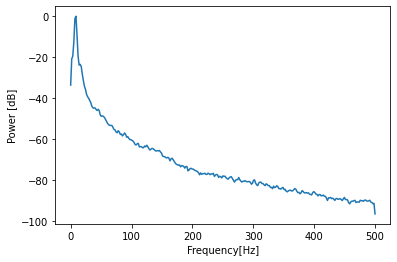

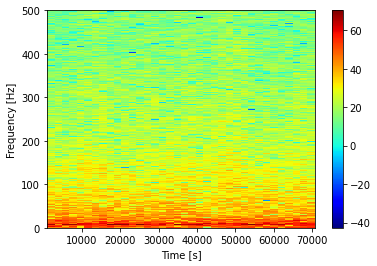

Rat 2
311


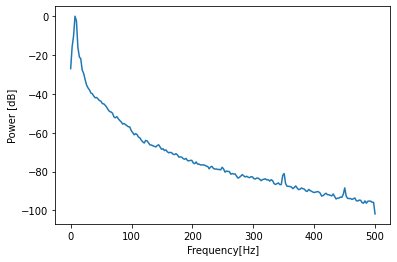

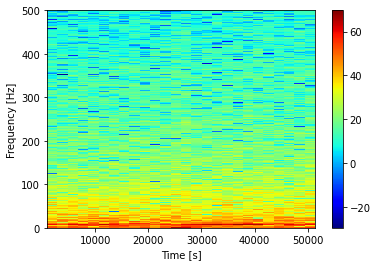

Rat 3
311


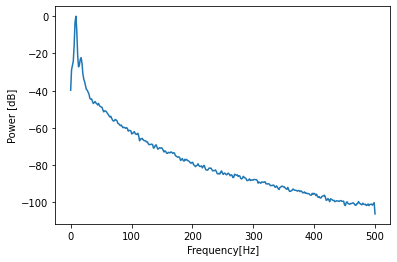

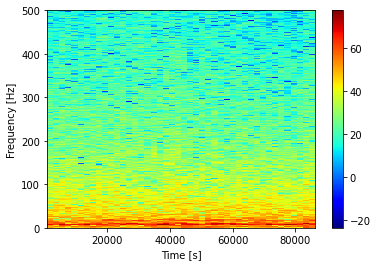

Rat 4
311


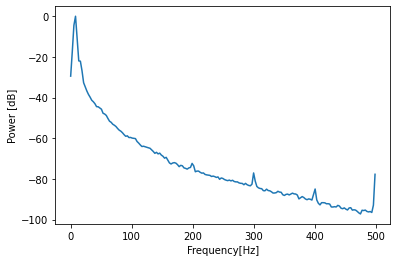

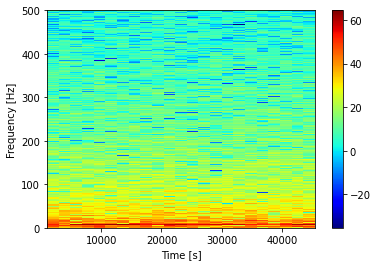

Rat 6
311


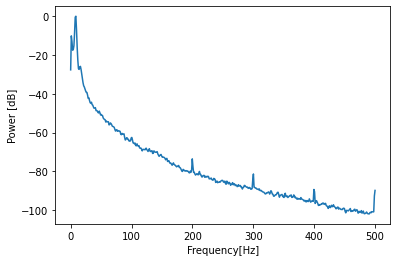

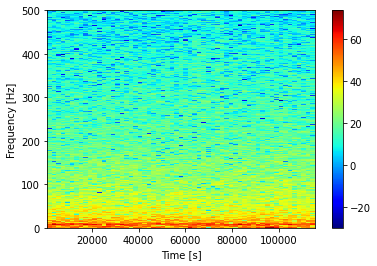

Rat 7
311


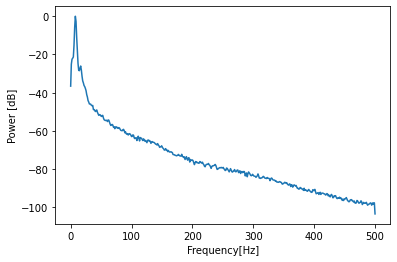

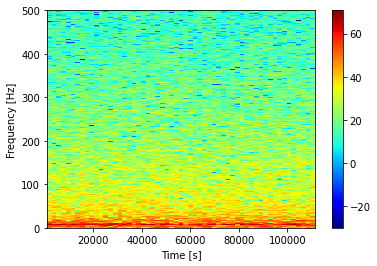

Rat 8
311


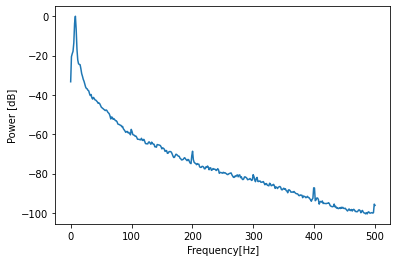

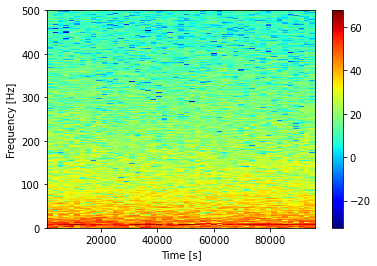

Rat 9
311


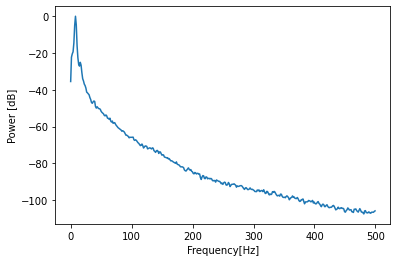

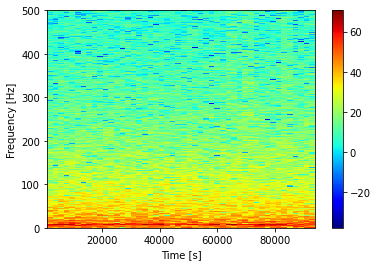

In [163]:
## i=0
# length =np.inf
# for rats in range(1,10):
#     if rats != 5:
#         print('Rat',rats)
#         saf =df_hpc.loc[df_pfc.Rat==rats, 'Spectral Analysis Frequency']
#         sap = df_hpc.loc[df_pfc.Rat==rats,'Spectral Analysis Power']
#         data =df_hpc.loc[df_pfc.Rat==rats, 'Raw Data']
#         length=int(np.array([len([float(num) for num in s.split(',')[1:-1]]) for s in saf]).mean())
#         length_data = int(np.array([len([float(num) for num in d.split(',')[1:-1]]) for d in data]).mean())
#         epochd = np.zeros([length_data])
#         print(length)
#         i=0
#         for d in data:
#             d = [float(num) for num in d.split(',')[1:-1]]
#             if len(d) >= length_data:
#                 i+=1
#                 epochd+=np.array(d[:length_data])
#         x = np.array(epochd)/i
#         N = x.shape[0] 
#         t = np.array(range(len(x)))
#         # Define the total number of data points
#         dt = t[1]-t[0]
#         T = t[-1]
#         x = x - x.mean()
#         f,pxx = welch(x, 2, nperseg=N//125)    # Compute Power spectral density Welch
#         Sxx = 2 * dt ** 2 / T * (pxx * conj(pxx)) # Compute spectrum
#         Sxx = Sxx[:int(len(x) / 2)]
#         ylabel('Power [dB]')
#         xlabel('Frequency[Hz]')
#         plot(f*500, (10*log10(Sxx / max(Sxx))))
#         savefig('Averaged/HPC/Spectral_Analysis/Decibel_Power/Rat%i_Averaged_2_125' %rats)
#         show()
#         f, t, Sxx = spectrogram(
#             x,                  # Provide the signal,
#             fs=Fs,                # ... the sampling frequency,
#             nperseg=interval,     # ... the length of a segment,
#             noverlap=overlap)     # ... the number of samples to overlap,
#         pcolormesh(t, f*1000, 10 * log10(Sxx),
#                        cmap='jet')# Plot the result
#         colorbar()                # ... with a color bar,
#         xlabel('Time [s]')        # ... and label the axes
#         ylabel('Frequency [Hz]')
#         savefig('Averaged/PFC/Spectral_Analysis/Spectrogram/Rat%i_Averaged' %rats)

#         show()